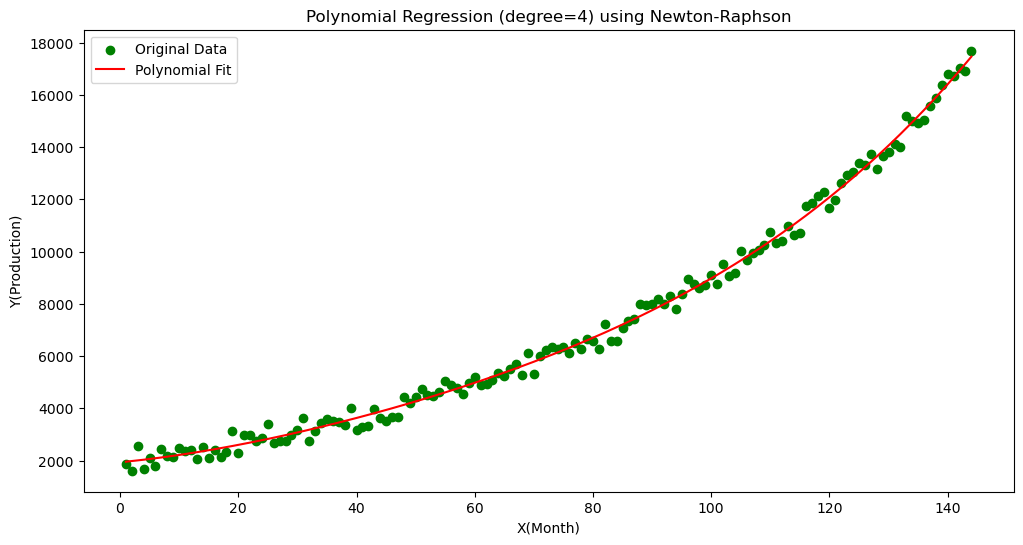

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

#data
x = list(range(1, 145))

y = [1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
    2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
    3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
    3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
    4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235,
    6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
    7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
    10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123,
    12274, 11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162,
    13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893,
    16388, 16782, 16716, 17033, 16896, 17689]

X = np.array(x).reshape(-1, 1)
y = np.array(y[:144])

degree = 4  #degree

poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X)

#Newton Rhapson

def newton_raphson(X, y, max_iter=100, tol=1e-6):
    m, n = X.shape
    theta = np.zeros(n)
    
    for _ in range(max_iter):
        y_pred = X.dot(theta)
        
        residuals = y_pred - y
        
        gradient = X.T.dot(residuals) / m
        
        H = X.T.dot(X) / m
        
        delta_theta = np.linalg.solve(H, gradient)
        theta -= delta_theta
        
        if np.linalg.norm(delta_theta) < tol:
            break
    
    return theta


theta = newton_raphson(X_poly, y)

#predict the values
y_pred = X_poly.dot(theta)

plt.figure(figsize=(12 , 6)) #size of the plot

plt.scatter(X, y, color='green', label='Original Data')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')

#label of plot
plt.xlabel('X(Month)')
plt.ylabel('Y(Production)')
#tittle 
plt.title(f'Polynomial Regression (degree={degree}) using Newton-Raphson')

plt.legend()
plt.show()